In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
import pickle


In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
df = pd.DataFrame(mnist.load_data())

In [6]:
df[0][0].shape

(60000, 28, 28)

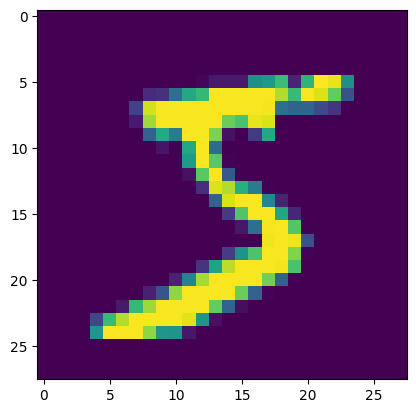

In [7]:
plt.imshow(x_train[0])

In [8]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

x_train.shape , x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

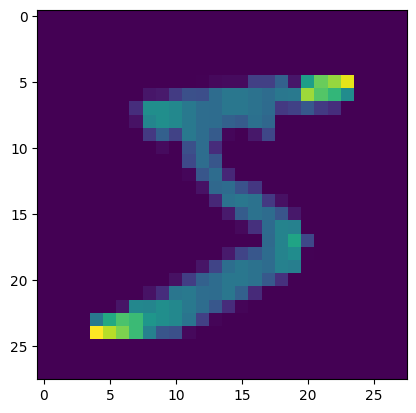

In [9]:
plt.imshow(x_train[0])

In [10]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [12]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics="accuracy")


In [13]:
len(x_train)

60000

In [14]:
model.fit(x_train,y_train,epochs=5, validation_split=0.3)

Epoch 1/5


1313/1313 [==============================] - 21s 15ms/step - loss: 0.1943 - accuracy: 0.9410 - val_loss: 0.0755 - val_accuracy: 0.9763
Epoch 2/5
1313/1313 [==============================] - 19s 14ms/step - loss: 0.0622 - accuracy: 0.9807 - val_loss: 0.0694 - val_accuracy: 0.9782
Epoch 3/5
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0406 - accuracy: 0.9873 - val_loss: 0.0501 - val_accuracy: 0.9847
Epoch 4/5
1313/1313 [==============================] - 16s 13ms/step - loss: 0.0312 - accuracy: 0.9899 - val_loss: 0.0463 - val_accuracy: 0.9859
Epoch 5/5
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0218 - accuracy: 0.9925 - val_loss: 0.0508 - val_accuracy: 0.9860


In [15]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0435 - accuracy: 0.9876


[0.04351825267076492, 0.9876000285148621]

In [16]:
y_pred = model.predict([x_test])
y_pred

313/313 [==============================] - 2s 5ms/step


array([[8.98666883e-08, 1.72592554e-08, 2.22026802e-06, ...,
        9.99989271e-01, 1.89476964e-07, 2.18169521e-06],
       [2.65260752e-07, 7.73677513e-08, 9.99998927e-01, ...,
        6.92400720e-11, 1.62282632e-07, 6.42639067e-12],
       [5.68179015e-09, 9.99981403e-01, 7.22336857e-09, ...,
        1.13377844e-07, 1.81540841e-07, 2.38568343e-09],
       ...,
       [4.61044267e-12, 2.12489892e-09, 1.02916686e-11, ...,
        1.94454035e-08, 4.77222262e-09, 3.04634042e-08],
       [1.50918723e-07, 4.97708125e-11, 3.29013154e-08, ...,
        6.41034751e-13, 1.27898557e-02, 4.71342476e-09],
       [2.58745096e-08, 1.05224082e-07, 1.06791886e-05, ...,
        1.58037292e-10, 4.09316726e-06, 2.90240854e-09]], dtype=float32)

In [17]:
y_pred = np.argmax(y_pred,1)

In [18]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [19]:
tf.equal(y_pred,y_test)

<tf.Tensor: shape=(10000,), dtype=bool, numpy=array([ True,  True,  True, ...,  True,  True,  True])>

In [20]:
pickle.dump(model,open('model.pkl','wb'))